# Part 2: Exploratory Data Analysis

Generated features will help to understand dynamic properties of historical data. 

## Importing Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
import mplfinance as mpf
import seaborn as sns
import warnings
import plotting
import statsmodels.api as sm
from importlib import reload
import numpy as np
import operator
import importlib


warnings.filterwarnings('ignore')
# plt.rcParams['figure.dpi'] = 227 # native screen dpi for my computer

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Retrieving Data

In [2]:
files = os.listdir('data/stocks')
stocks = {}
for file in files:
    # Include only csv files
    if file.split('.')[1] == 'csv':
        name = file.split('.')[0]
        stocks[name] = pd.read_csv('data/stocks/'+file, index_col='Date')
        stocks[name].index = pd.to_datetime(stocks[name].index)

### List of Stocks

In [3]:
print('List of stocks:', end=' ')
for i in stocks.keys():
    print(i.upper(), end=' ')

List of stocks: CSCO ORCL EBAY AMZN INTC MSFT EA NVDA FB IBM TWTR NFLX TSLA VMW SHOP GOOG QCOM AAPL 

In [4]:
stocks['tsla'].head()

Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2010-07-28  20.549999  20.900000  20.510000  20.719999  20.719999   467200   
2010-07-29  20.770000  20.879999  20.000000  20.350000  20.350000   616000   
2010-07-30  20.200001  20.440001  19.549999  19.940001  19.940001   426900   
2010-08-02  20.500000  20.969999  20.330000  20.920000  20.920000   718100   
2010-08-03  21.000000  21.950001  20.820000  21.950001  21.950001  1230500   

            Return    Change  Volatility        MA7       MA21   Momentum  \
Date                                                                        
2010-07-28   0.008  0.170000    1.979836  20.718571  19.911904  18.290001   
2010-07-29  -0.020 -0.369999    1.908327  20.725714  19.743333  17.950001   
2010-07-30  -0.013 -0.409999    1.839567  20.685714  19.558095  17.549999   
2010-08-02   0.020  0.979999    1.789358  20.674286  19.508571  17.719999   
2010-08-03   0.045  1.030001    1.791139  20.768572  19.639524  17.350000   

                  RSI      MACD    Signal  Upper_band  Lower_band  
Date                                                               
2010-07-28  41.752948 -0.350607 -0.658177   24.403824   15.419985  
2010-07-29  40.449222 -0.337599 -0.594062   23.858103   15.628563  
2010-07-30  38.996148 -0.356267 -0.546503   23.226171   15.890019  
2010-08-02  44.159747 -0.288656 -0.494933   23.066887   15.950255  
2010-08-03  49.041837 -0.150230 -0.425993   23.349330   15.929718

## Check for Correlation

In [5]:
stocks['tsla'].corr()[['Return']].sort_values(by='Return', ascending=False)

Return
Return      1.000000
Change      0.643410
RSI         0.282943
Close       0.029047
Adj Close   0.029047
High        0.012160
Low         0.011276
MACD        0.008984
Volatility  0.006697
Volume      0.005950
Upper_band  0.002046
MA7         0.000094
MA21       -0.000007
Lower_band -0.002464
Momentum   -0.004965
Open       -0.007121
Signal     -0.029648

`Return` correlated with `Change` and `RSI`.

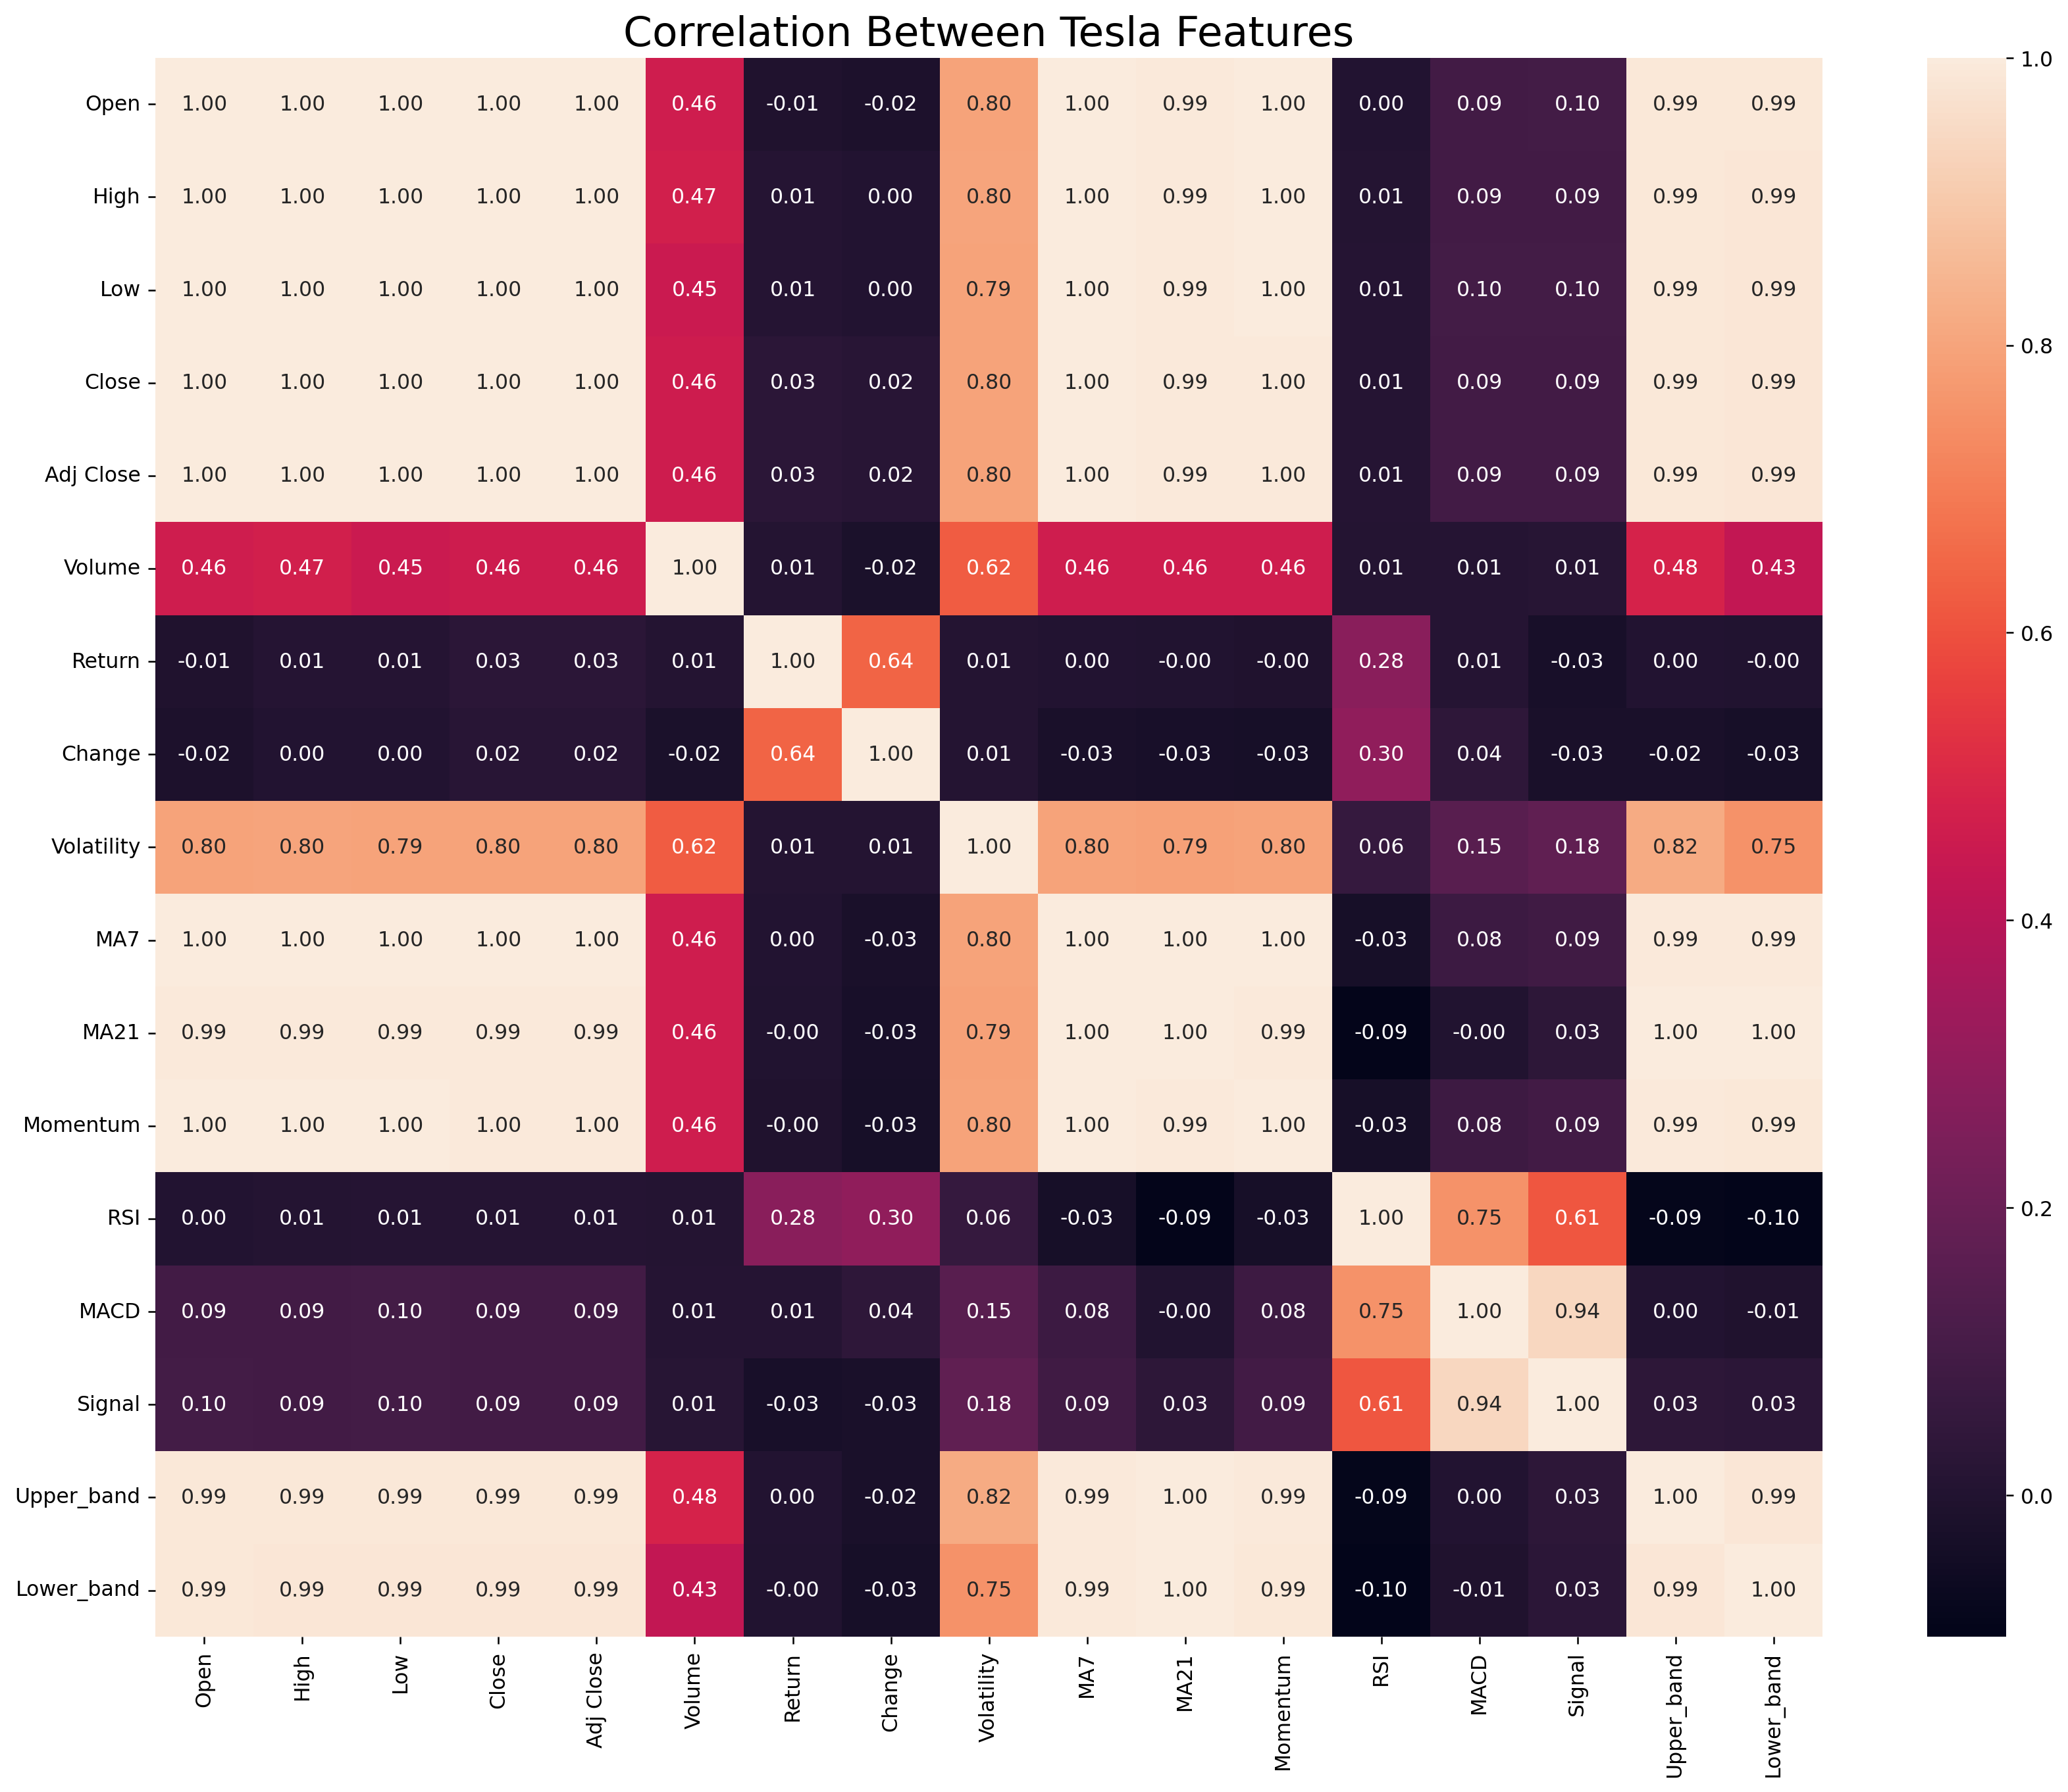

In [6]:
plt.rcParams['figure.dpi'] = 227
plt.figure(figsize=(18,14))
sns.heatmap(stocks['tsla'].corr(), annot=True, fmt='.2f')
plt.ylim(17, 0)
plt.title('Correlation Between Tesla Features', fontsize = 20)
plt.show()

### Bollinger Bands, RSI, MACD, Volume

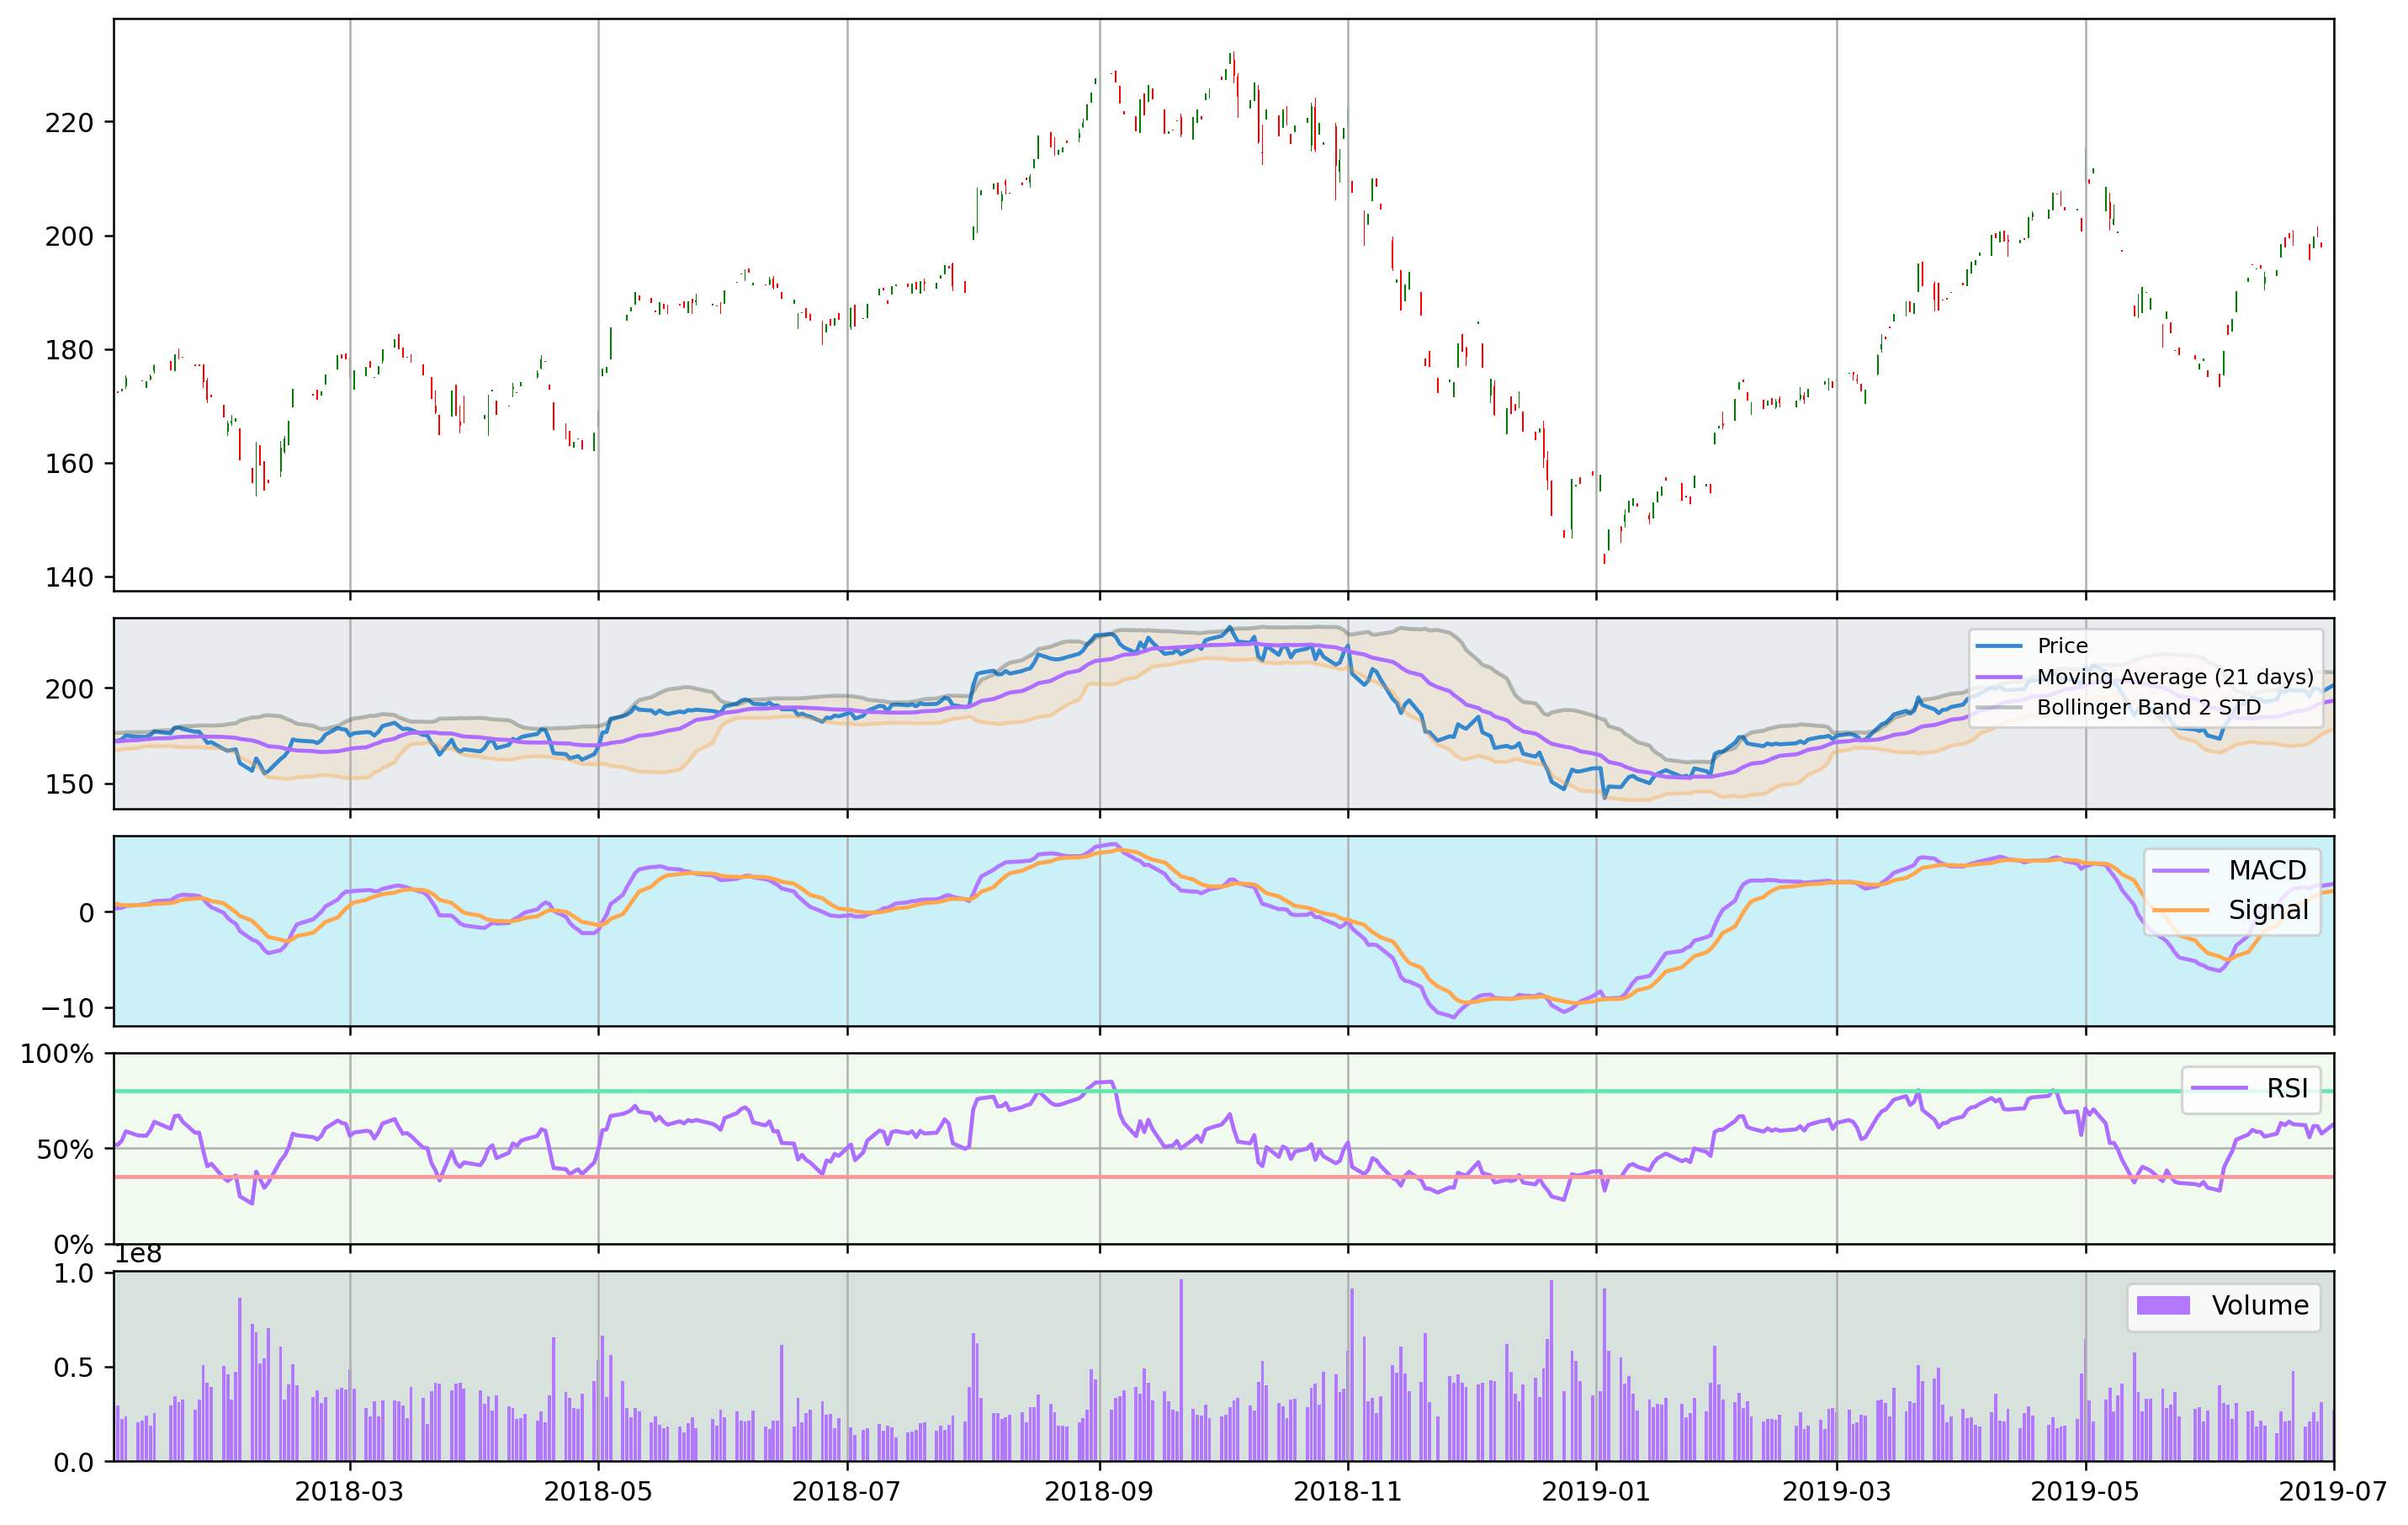

In [16]:
importlib.reload(plotting) #automatically updatet the module without reloading
plotting.stock_charts(stocks['aapl'].loc['2018-01-01':'2019-07-01'])

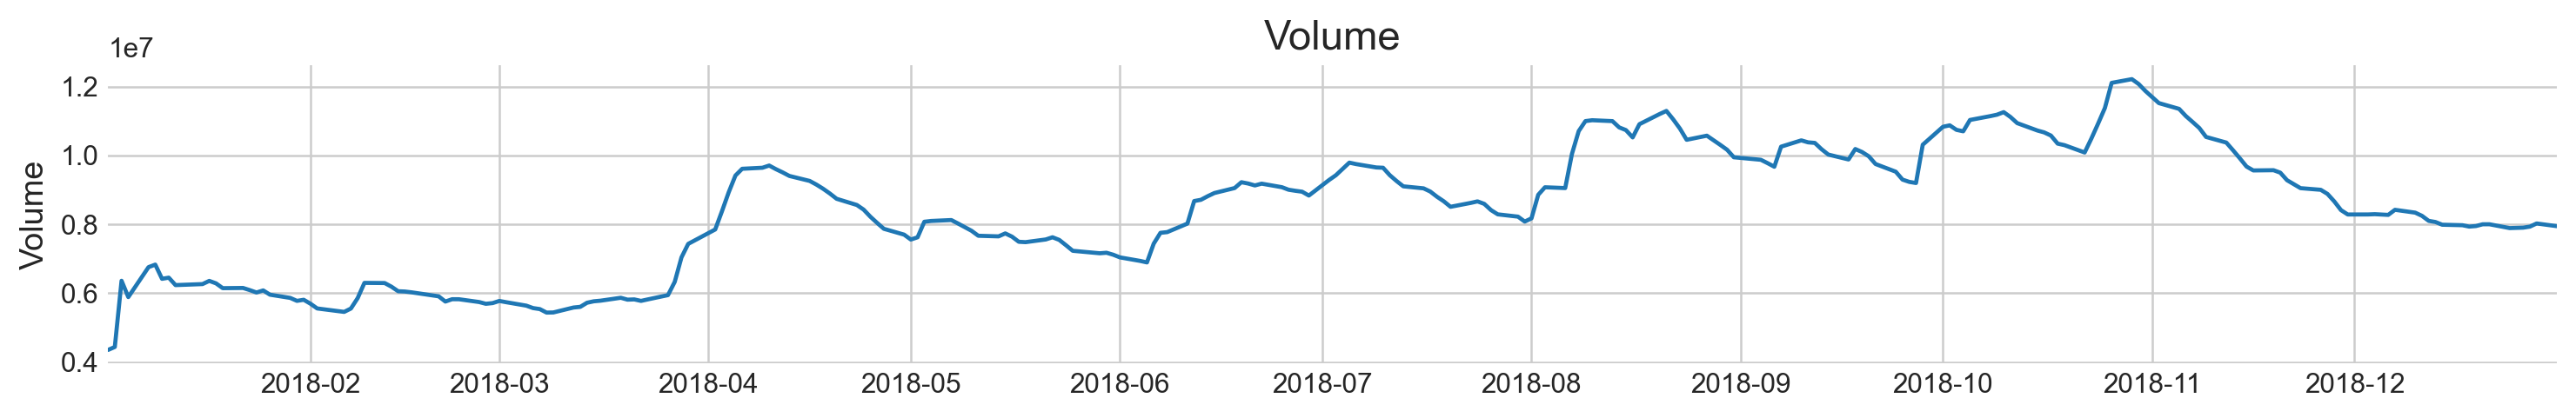

In [8]:
plotting.volume(stocks['tsla'].loc['2018':'2018'])

### Return by Month

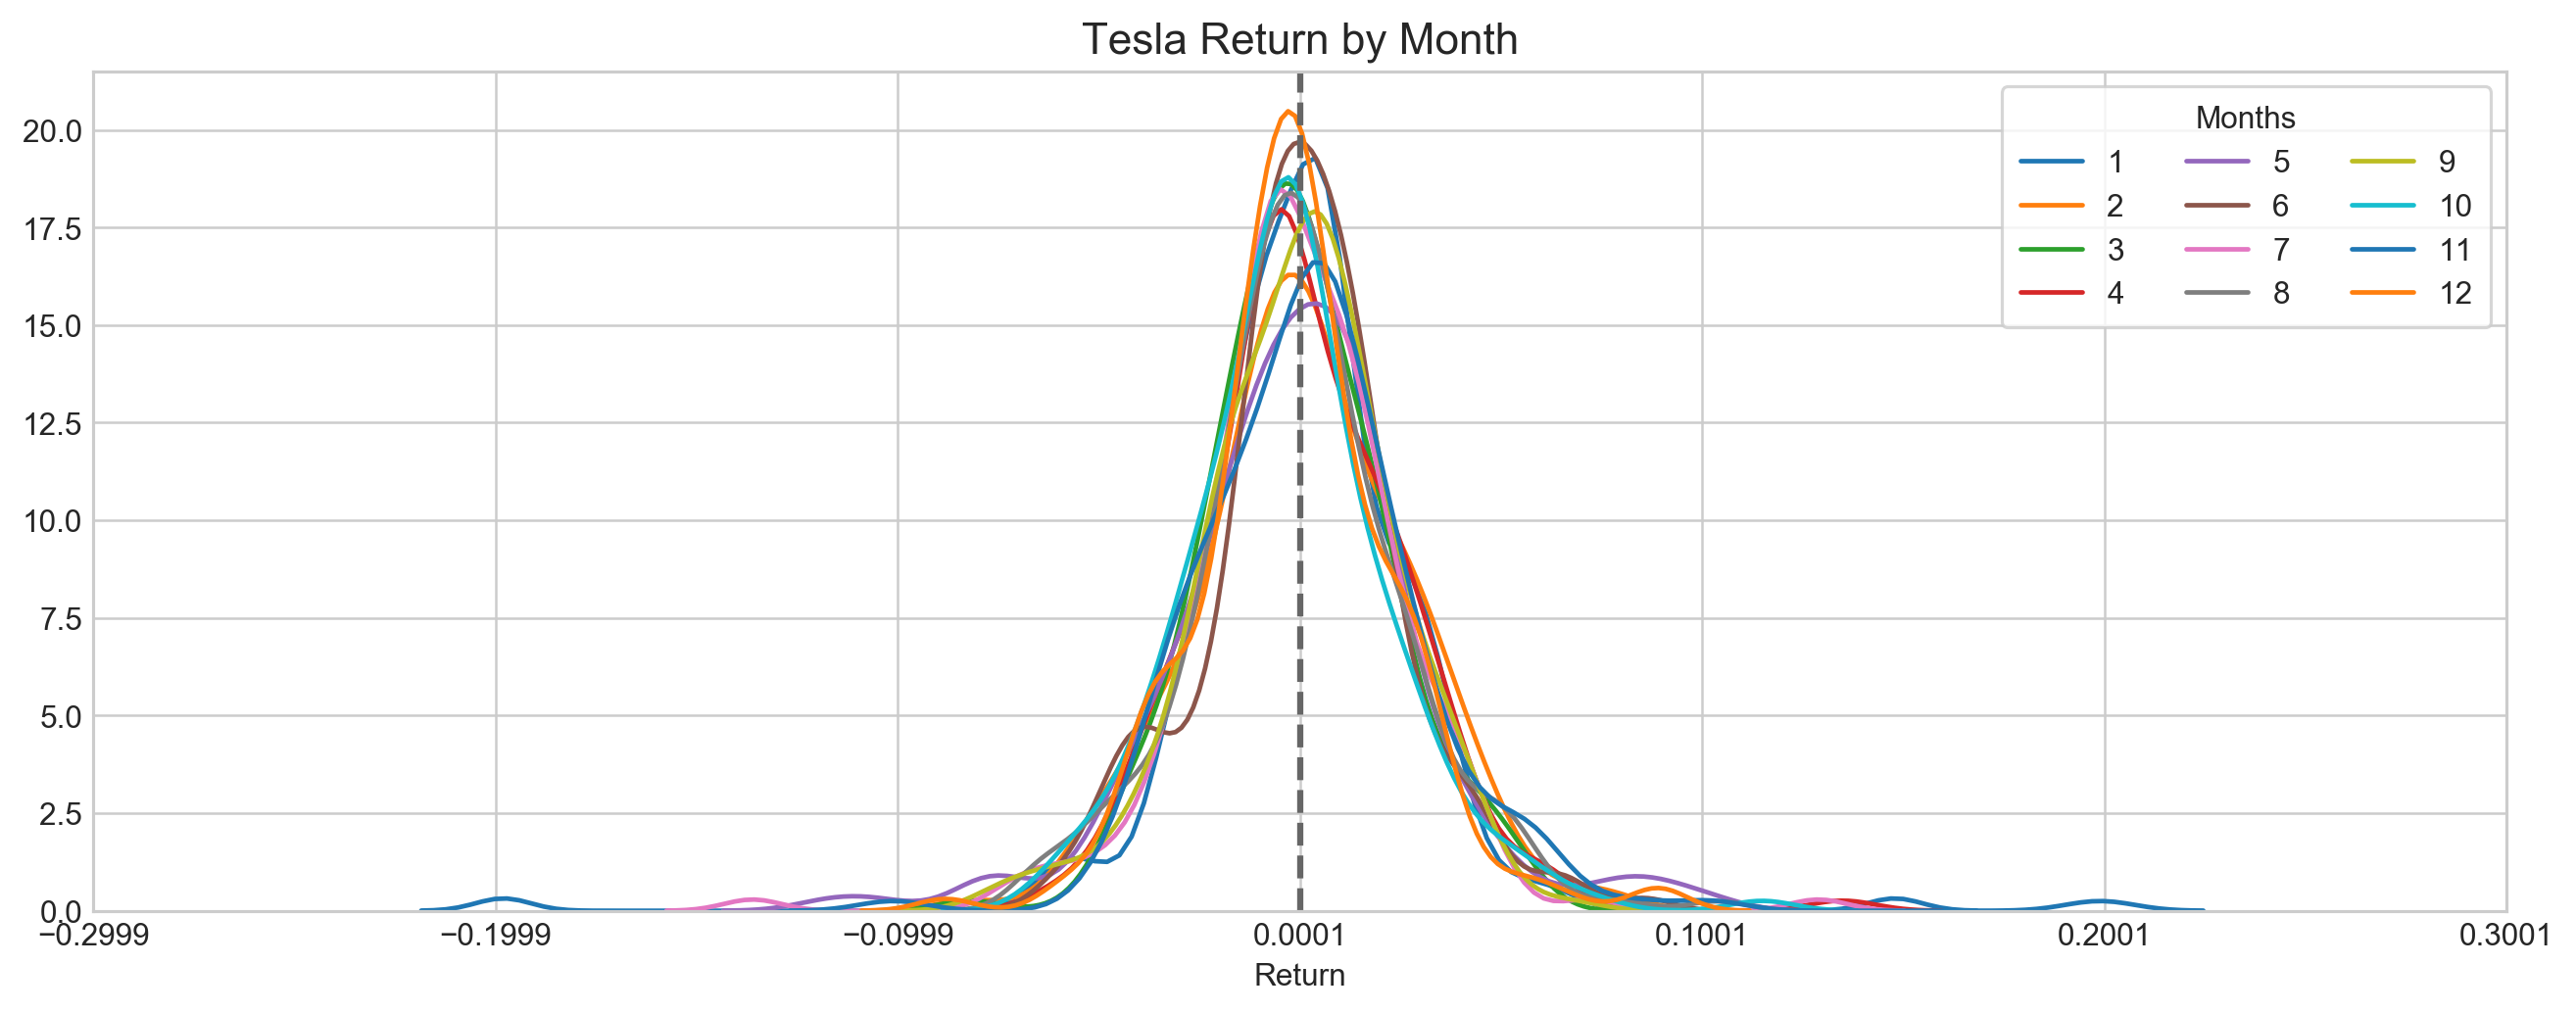

In [11]:
plt.figure(figsize=(14,5))
plt.style.use('seaborn-whitegrid')
for i in range(1,13):
    volatility = stocks['tsla'][stocks['tsla'].index.month==i].Return
    sns.distplot(volatility, hist=False, label=i)
    plt.legend(frameon=True, loc=1, ncol=3, fontsize=10, borderpad=.6, title='Months')
plt.axvline(stocks['tsla'].Return.mean(), color='#666666', ls='--', lw=2)
plt.xticks(plt.xticks()[0] + stocks['tsla'].Return.mean())
plt.title('Tesla Return by Month', fontsize=14)
plt.show()

### Returns for Each Day of the Month

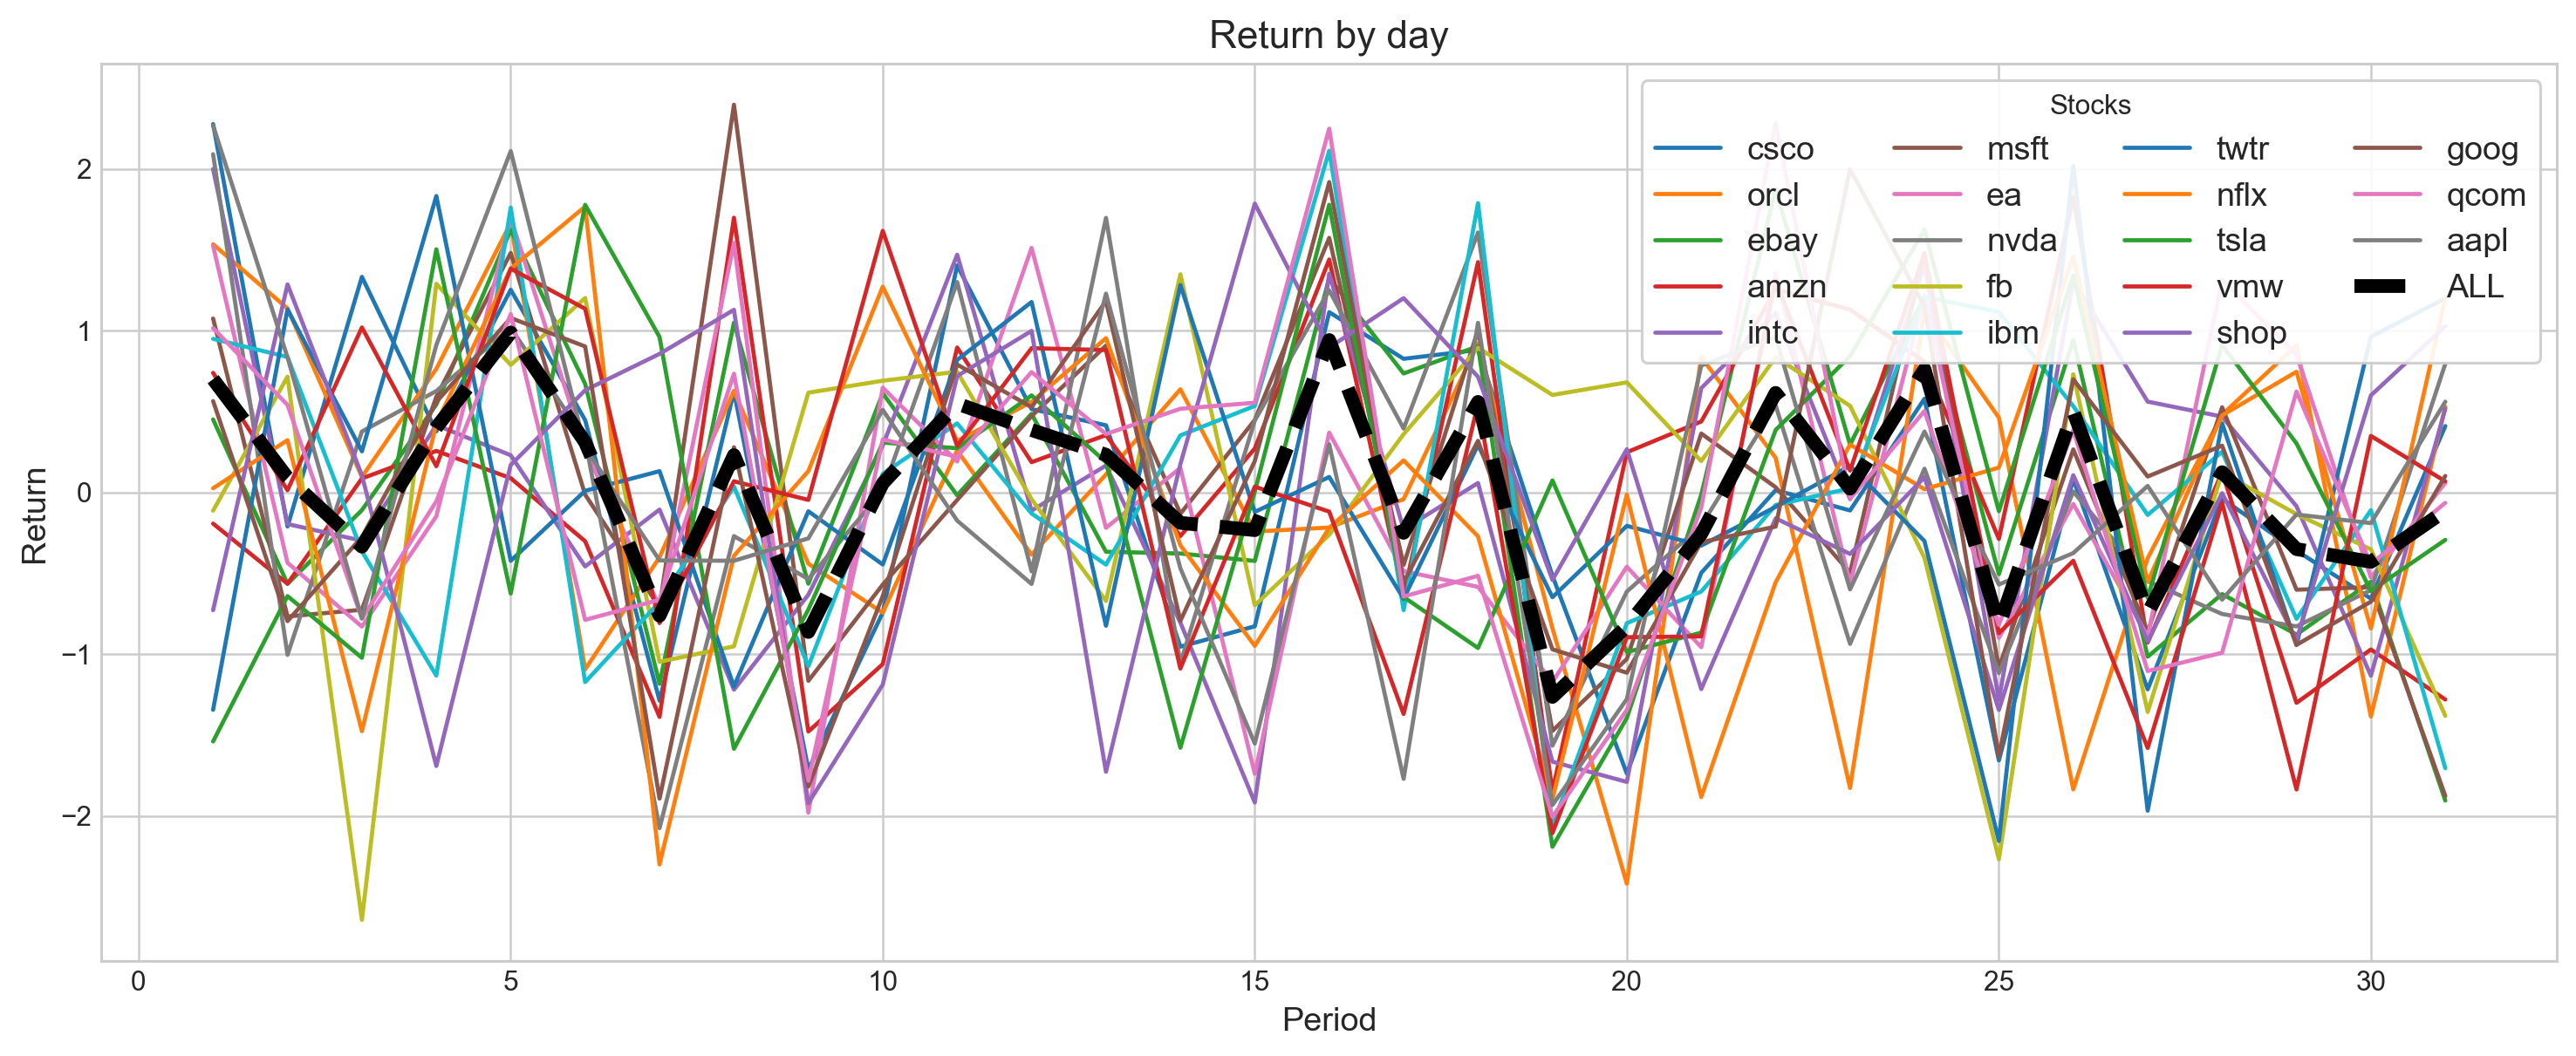

In [12]:
plotting.compare_stocks(stocks, value='Return', by='day', scatter=False)

### Returns for Each Month of the Year

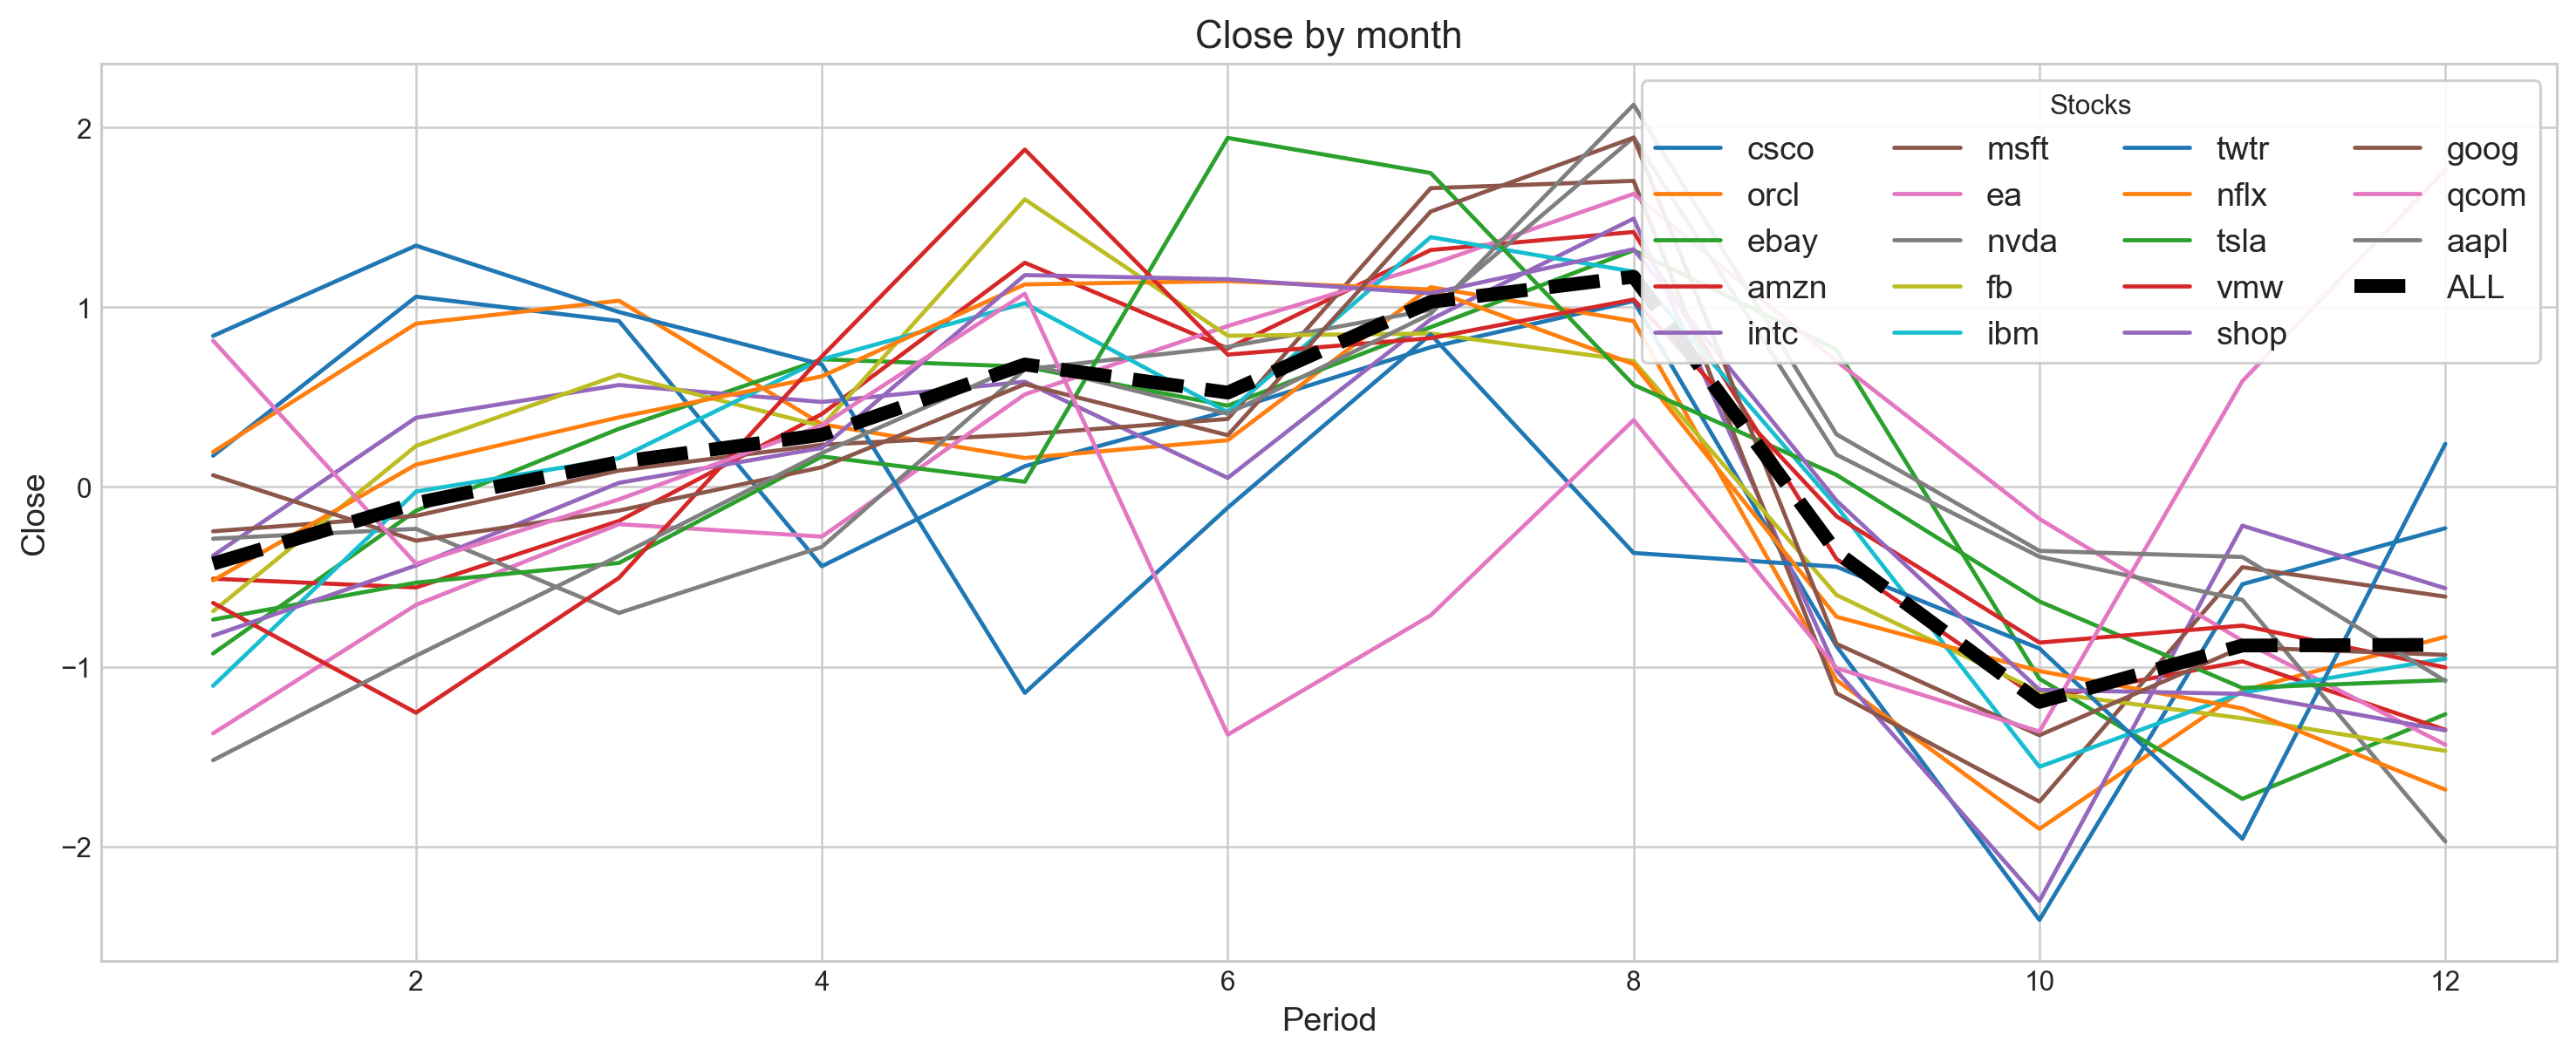

In [13]:
plotting.compare_stocks(stocks, value='Close', by='month', scatter=False)

### Combined Daily Return for Multiple Stocks

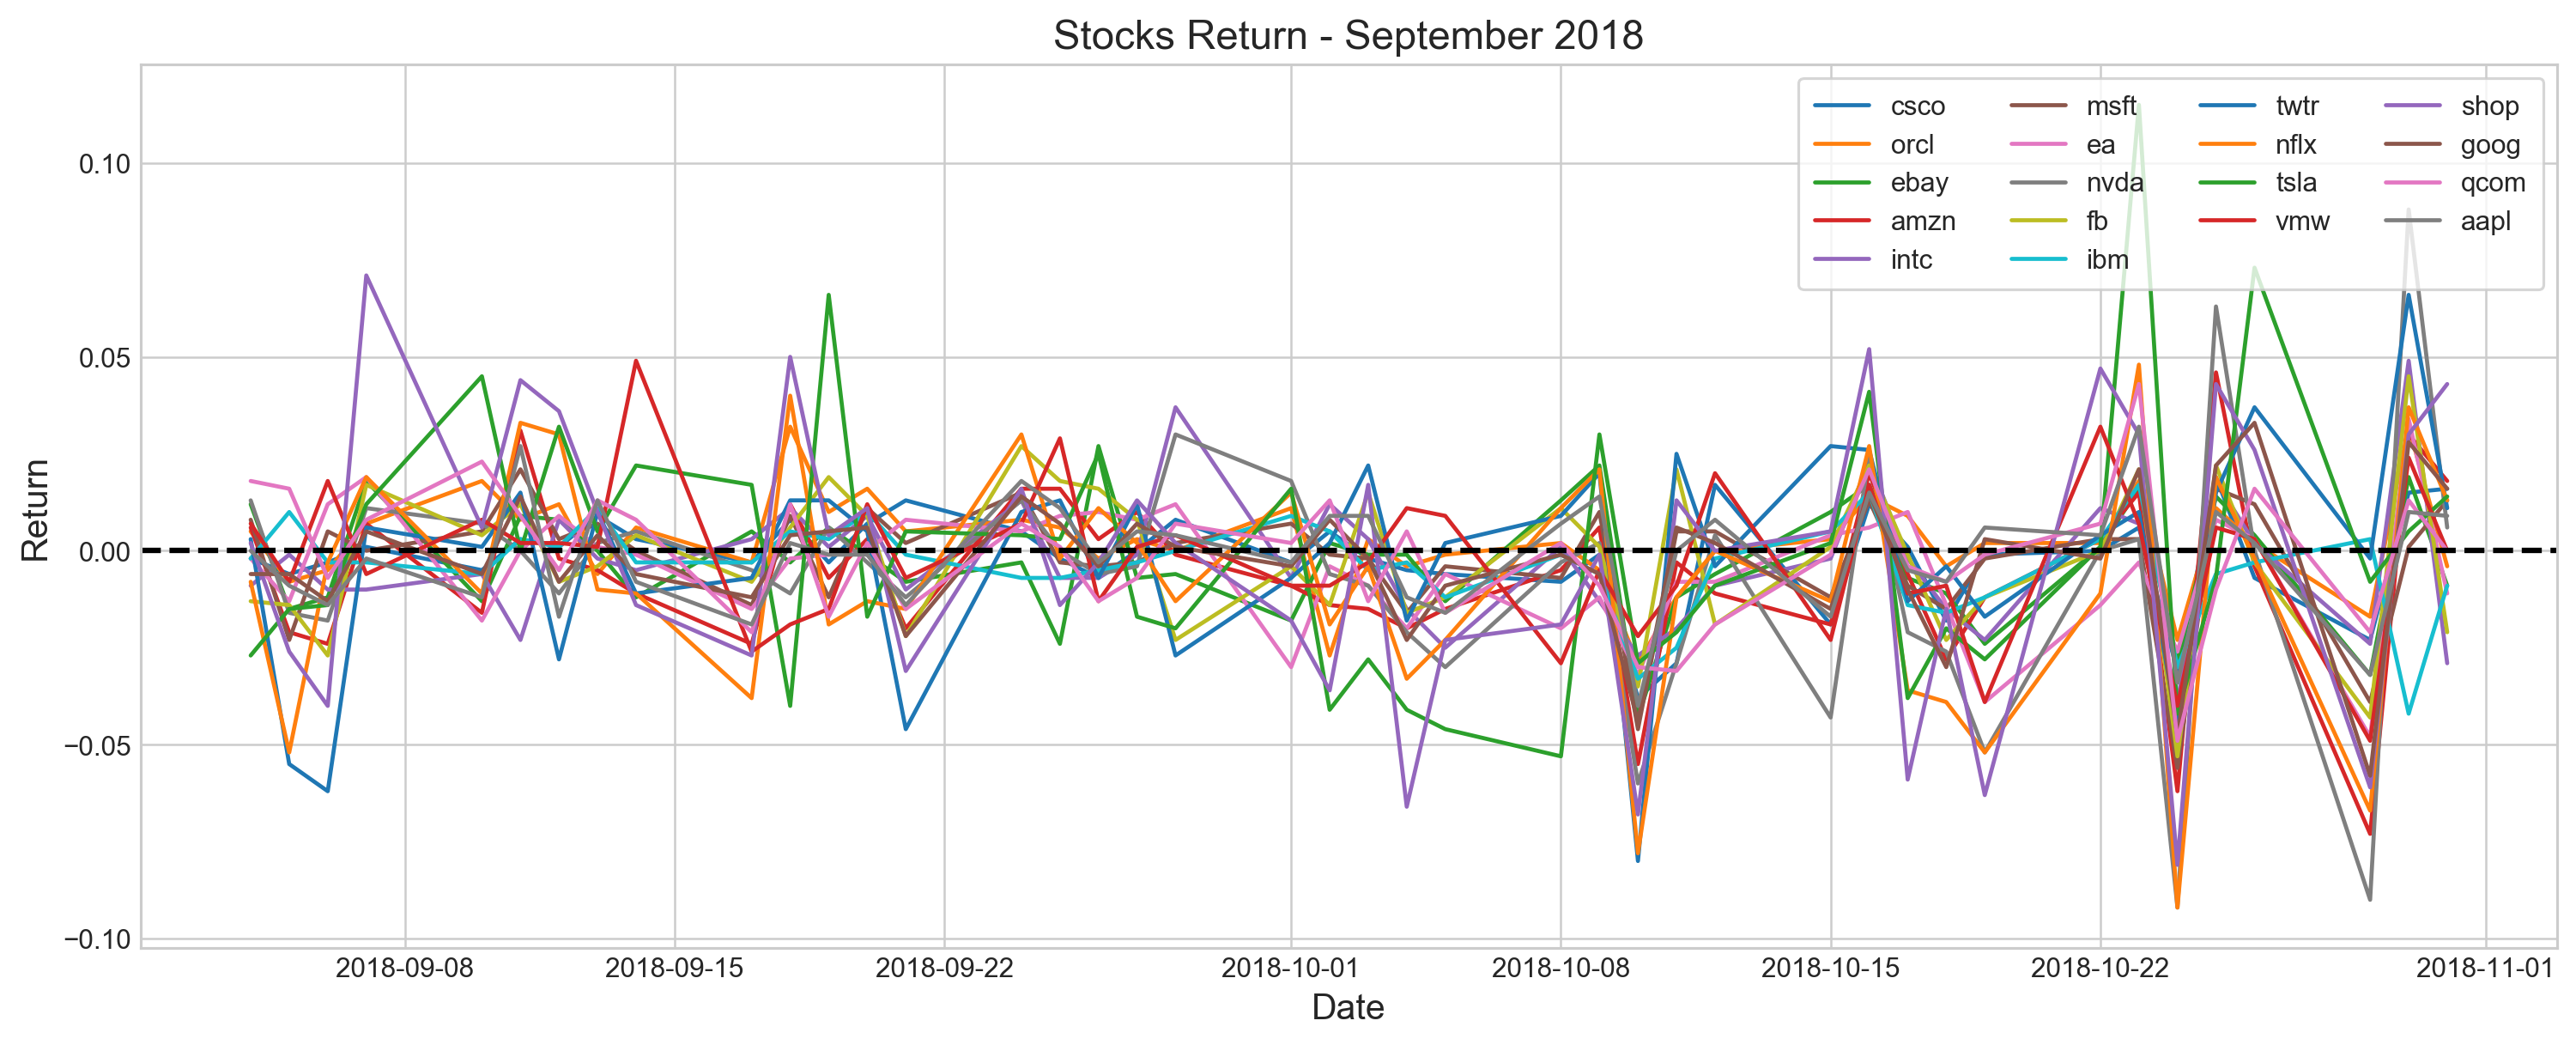

In [14]:
stocks_return_correlation = {}

plt.rcParams['figure.dpi'] = 227
plt.figure(figsize=(16,6))
plt.style.use('seaborn-whitegrid')
for i in stocks:    
    stocks_return_correlation[i] = stocks[i].loc['2018-9':'2018-10'].Return
    plt.plot(stocks[i].loc['2018-9':'2018-10'].Return, label=i)
    plt.legend(frameon=True, loc=1, ncol=4, fontsize=10, borderpad=.6)
plt.title('Stocks Return - September 2018', fontsize=15)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Return', fontsize=13)
plt.axhline(0, c='k', lw=2, ls='--')
plt.show()

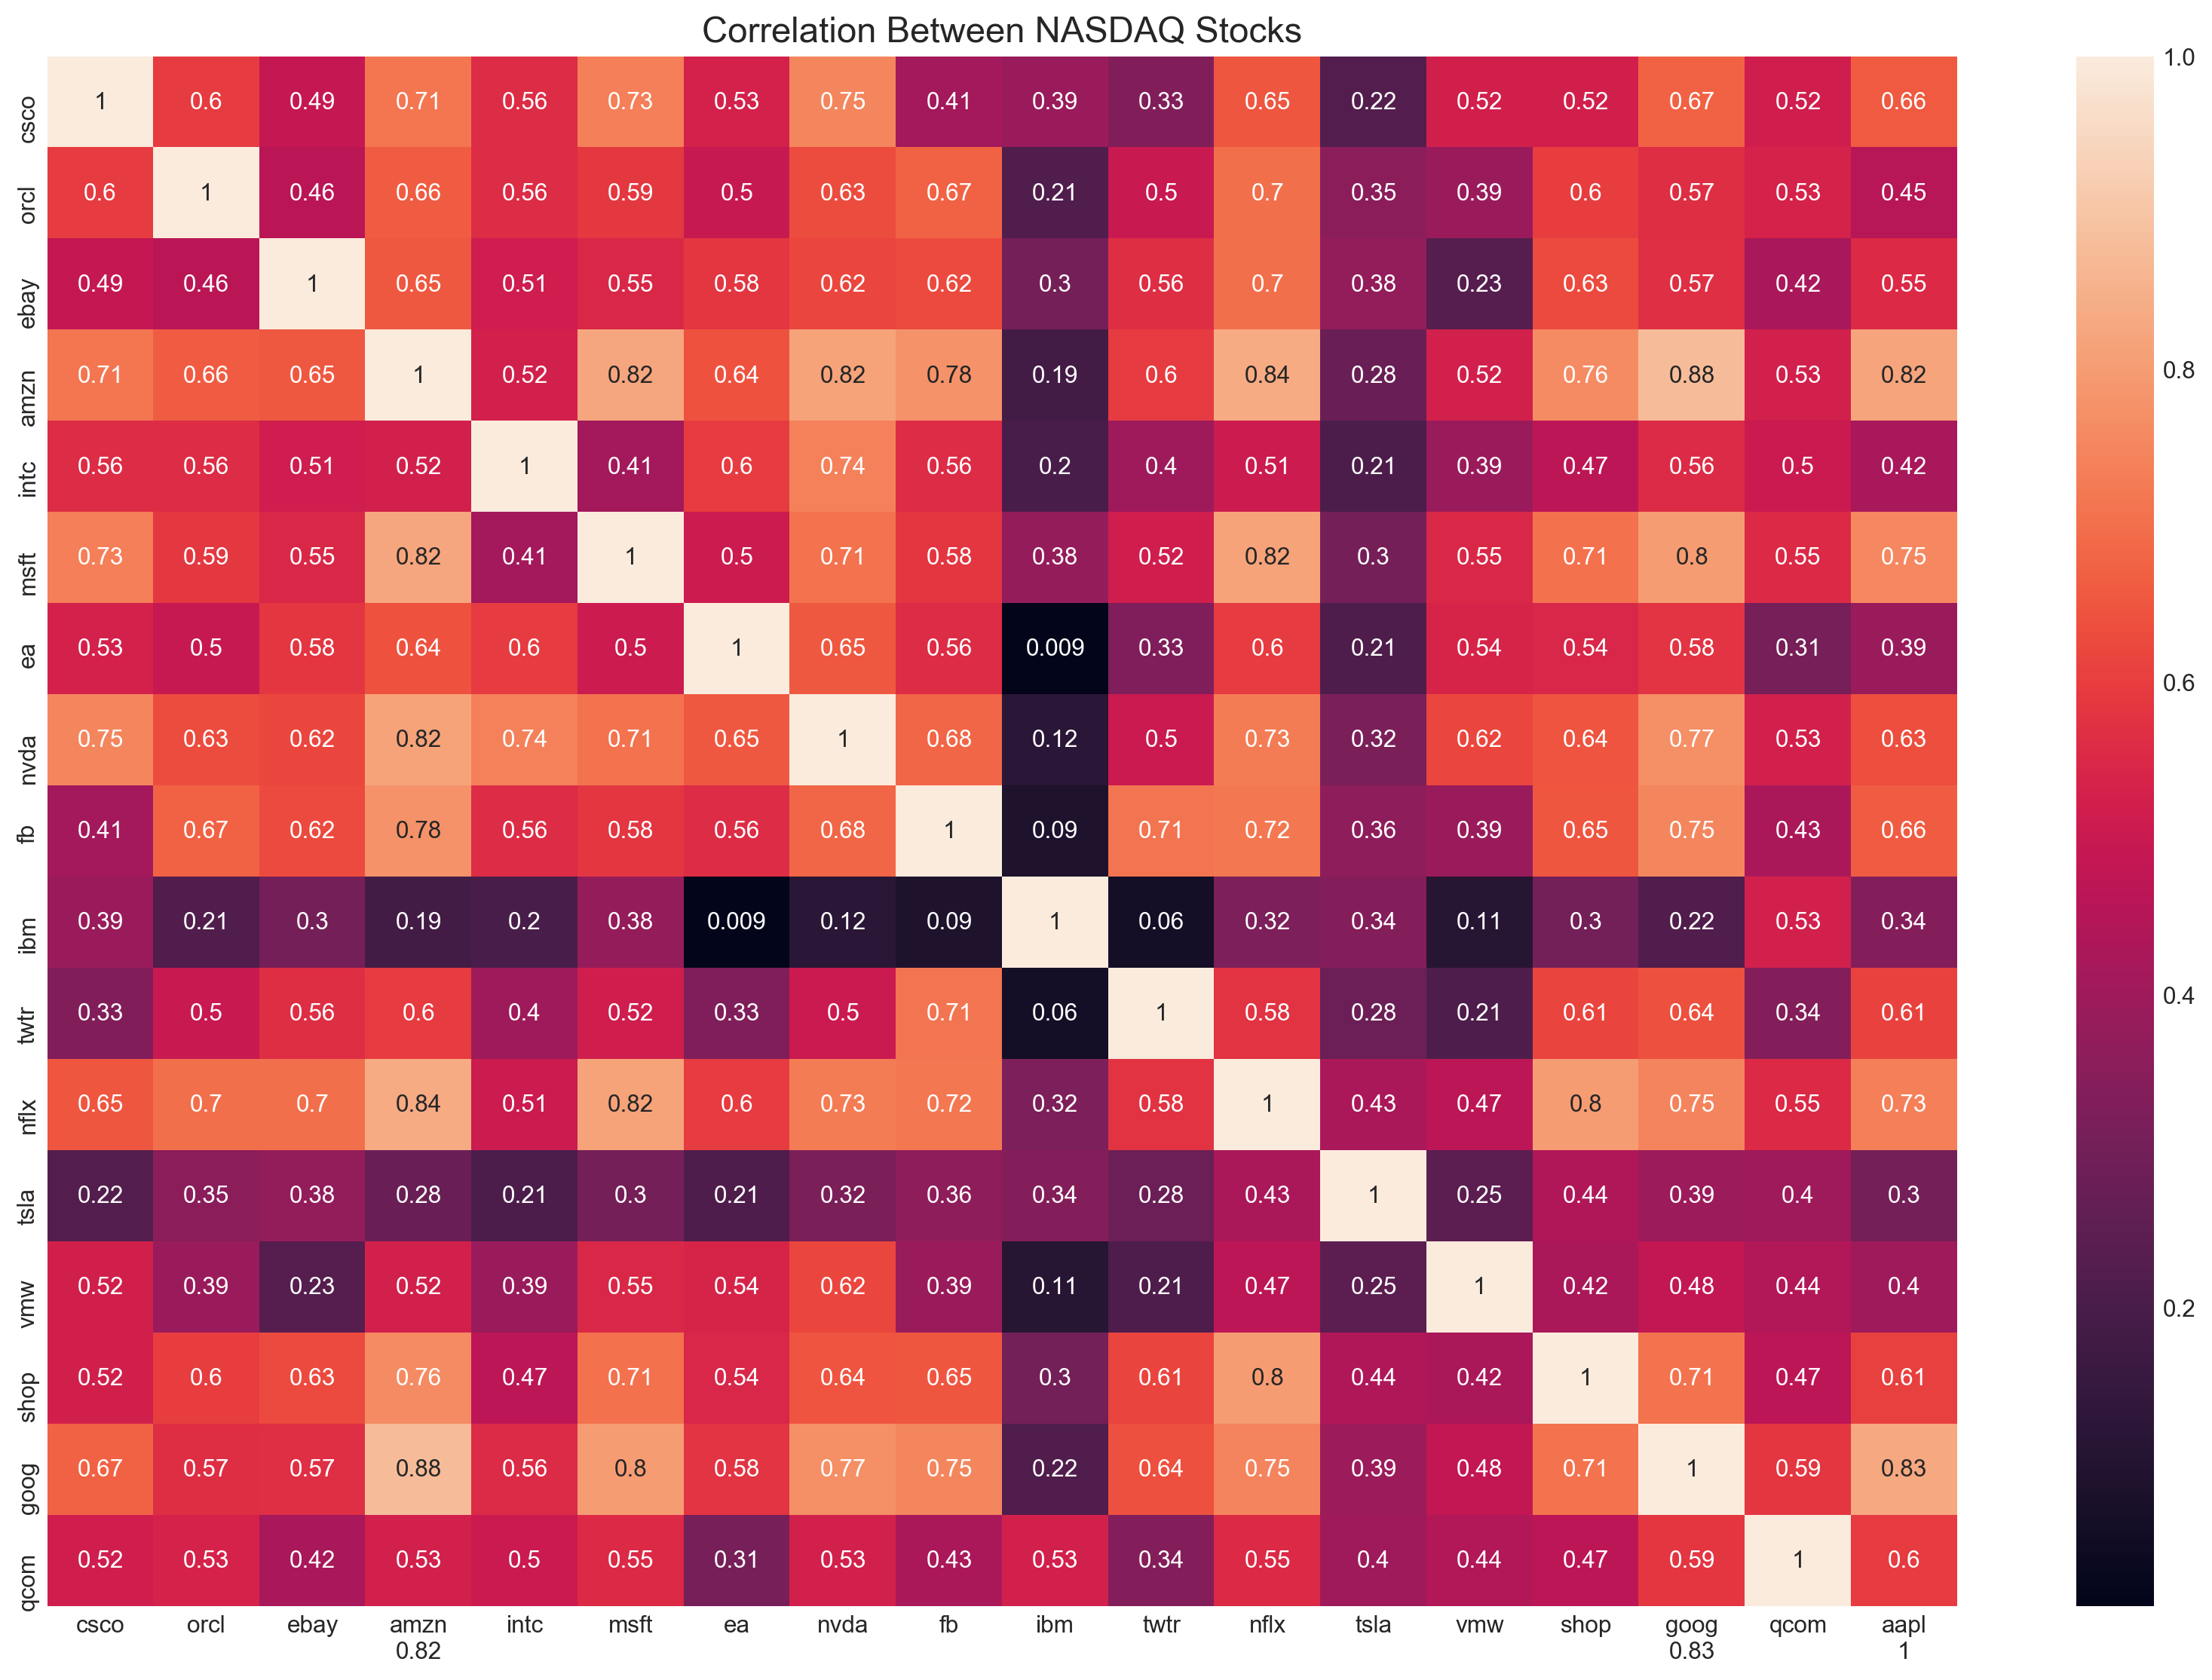

In [39]:
plt.figure(figsize=(18,12))
sns.heatmap(pd.DataFrame(stocks_return_correlation).corr(), annot=True)
plt.ylim(17, 0)
plt.title('Correlation Between NASDAQ Stocks', fontsize=15)
plt.show()

In [16]:
stocks_corr = {}

for i in stocks:
    stock1 = stocks[i].loc['2018':'2019'].Return
    c = {}
    for j in stocks:
        stock2 = stocks[j].loc['2018':'2019'].Return
        if i != j :
            c[j] = np.corrcoef(stock1, stock2)[0][1]
    m = max(c.items(), key=operator.itemgetter(1))
    stocks_corr[(i+"-"+m[0])] = [m[1]]

In [17]:
pd.DataFrame(stocks_corr).T.sort_values(by=0, ascending=False).head(10)

0
goog-amzn  0.794676
amzn-goog  0.794676
msft-goog  0.783769
csco-msft  0.735654
aapl-msft  0.731158
fb-goog    0.729484
nflx-amzn  0.723289
nvda-amzn  0.707795
orcl-msft  0.653197
shop-amzn  0.636029

### High-Low and Price

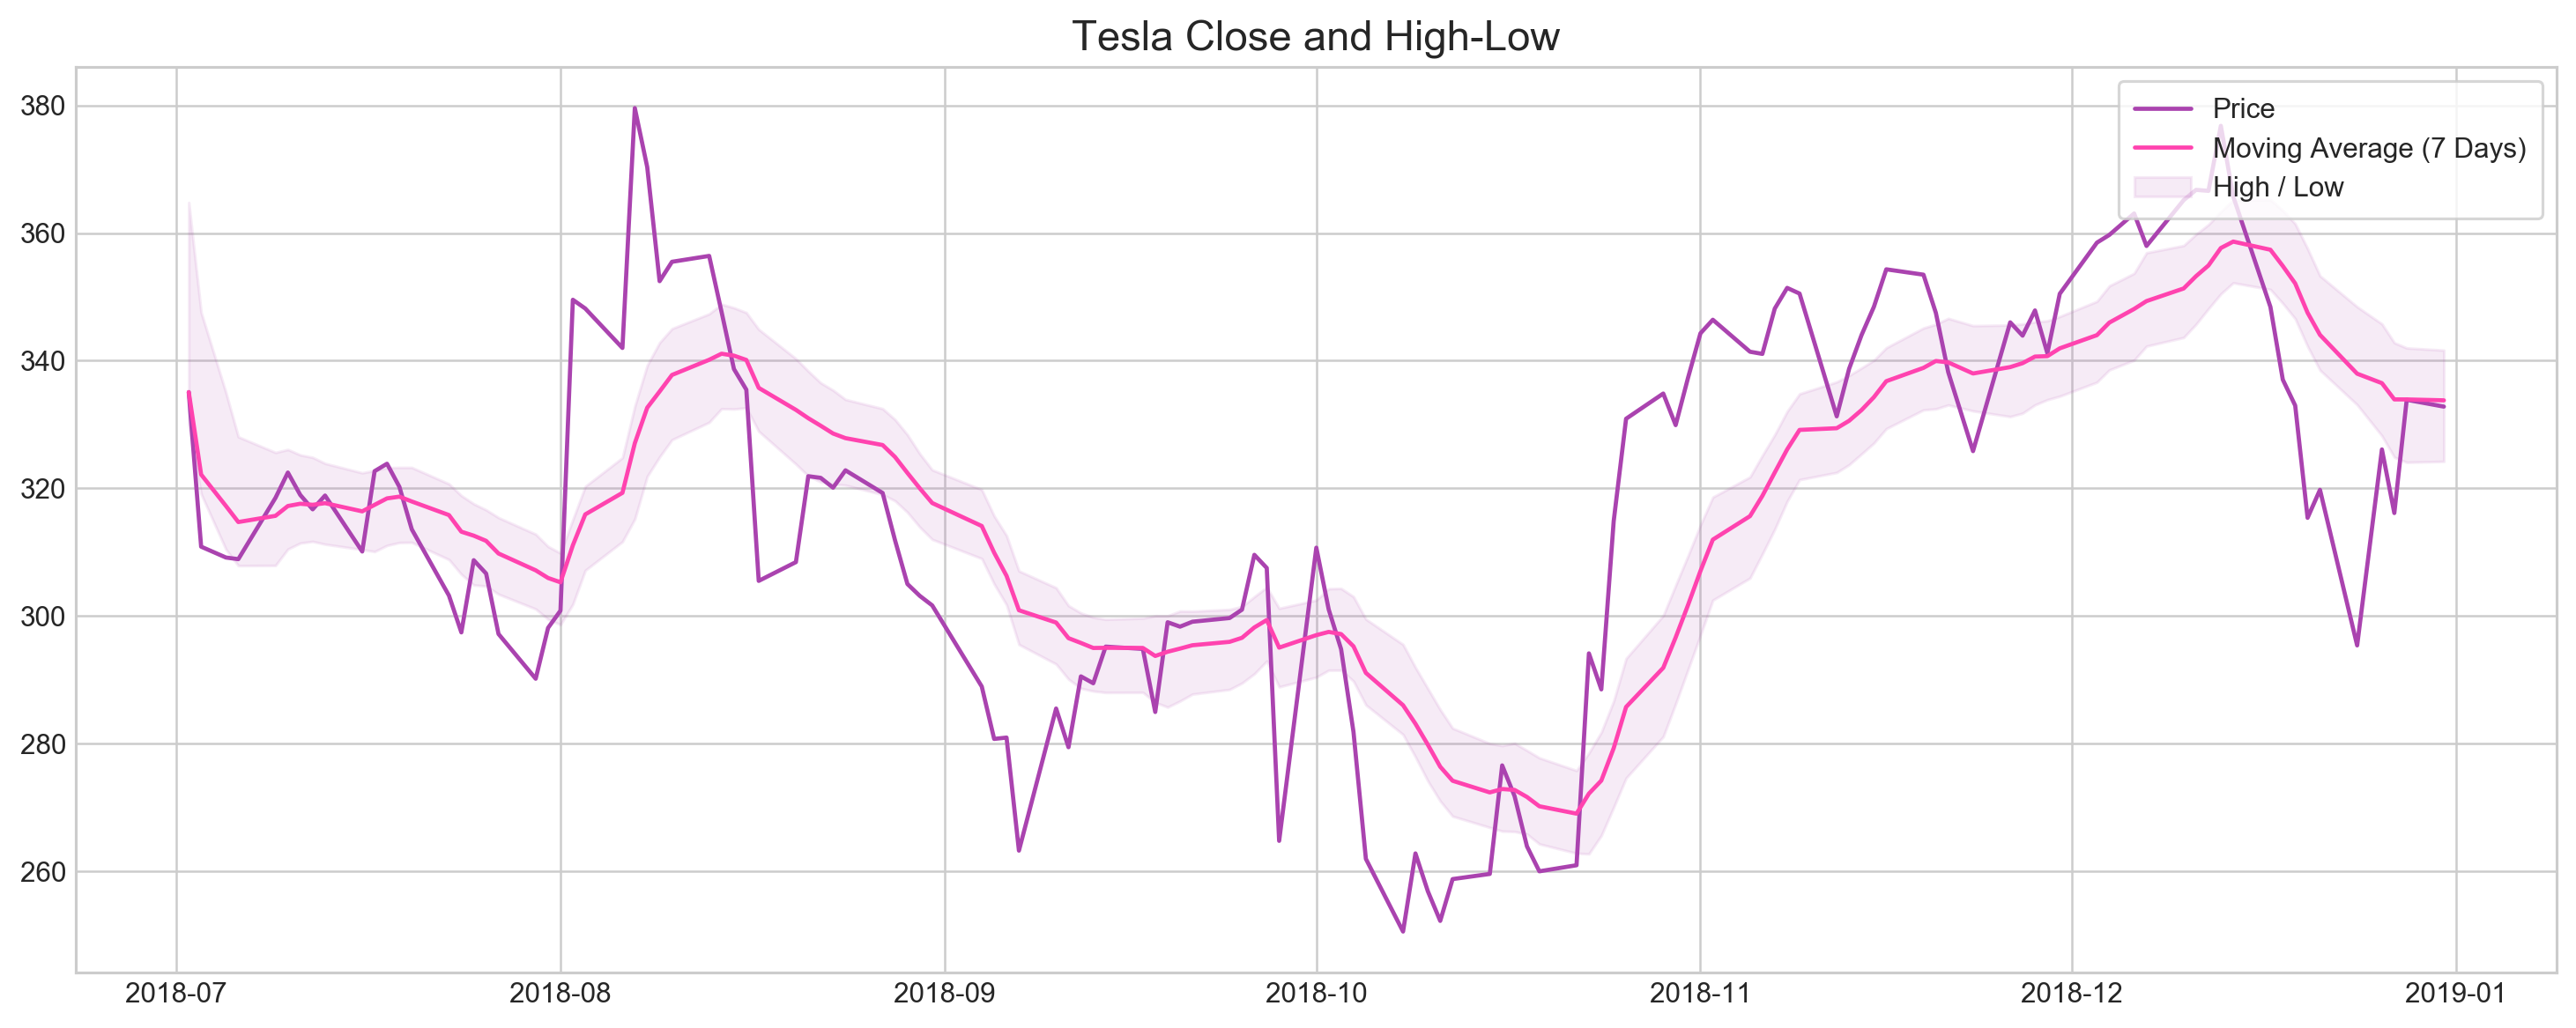

In [22]:
plt.figure(figsize=(16,6))

s = stocks['tsla'].loc['2018-7':'2018']
u = s.High.ewm(7).mean()
l = s.Low.ewm(7).mean()
plt.fill_between(s.index, u, l, color='#af43af', alpha=0.1, label='High / Low')
plt.plot(s.Close, color='#aa43af', label='Price')
plt.plot(s.Close.ewm(7).mean(), color='#ff43af', label='Moving Average (7 Days)')
plt.legend(frameon=True, loc=1, borderpad=.6)
plt.title('Tesla Close and High-Low', fontsize=15)
plt.show()

### Checking for Normality

Machine learning algorithms, including Neural Networks heavily rely on probability in learning process. Let's check target variable `Return` to normality.

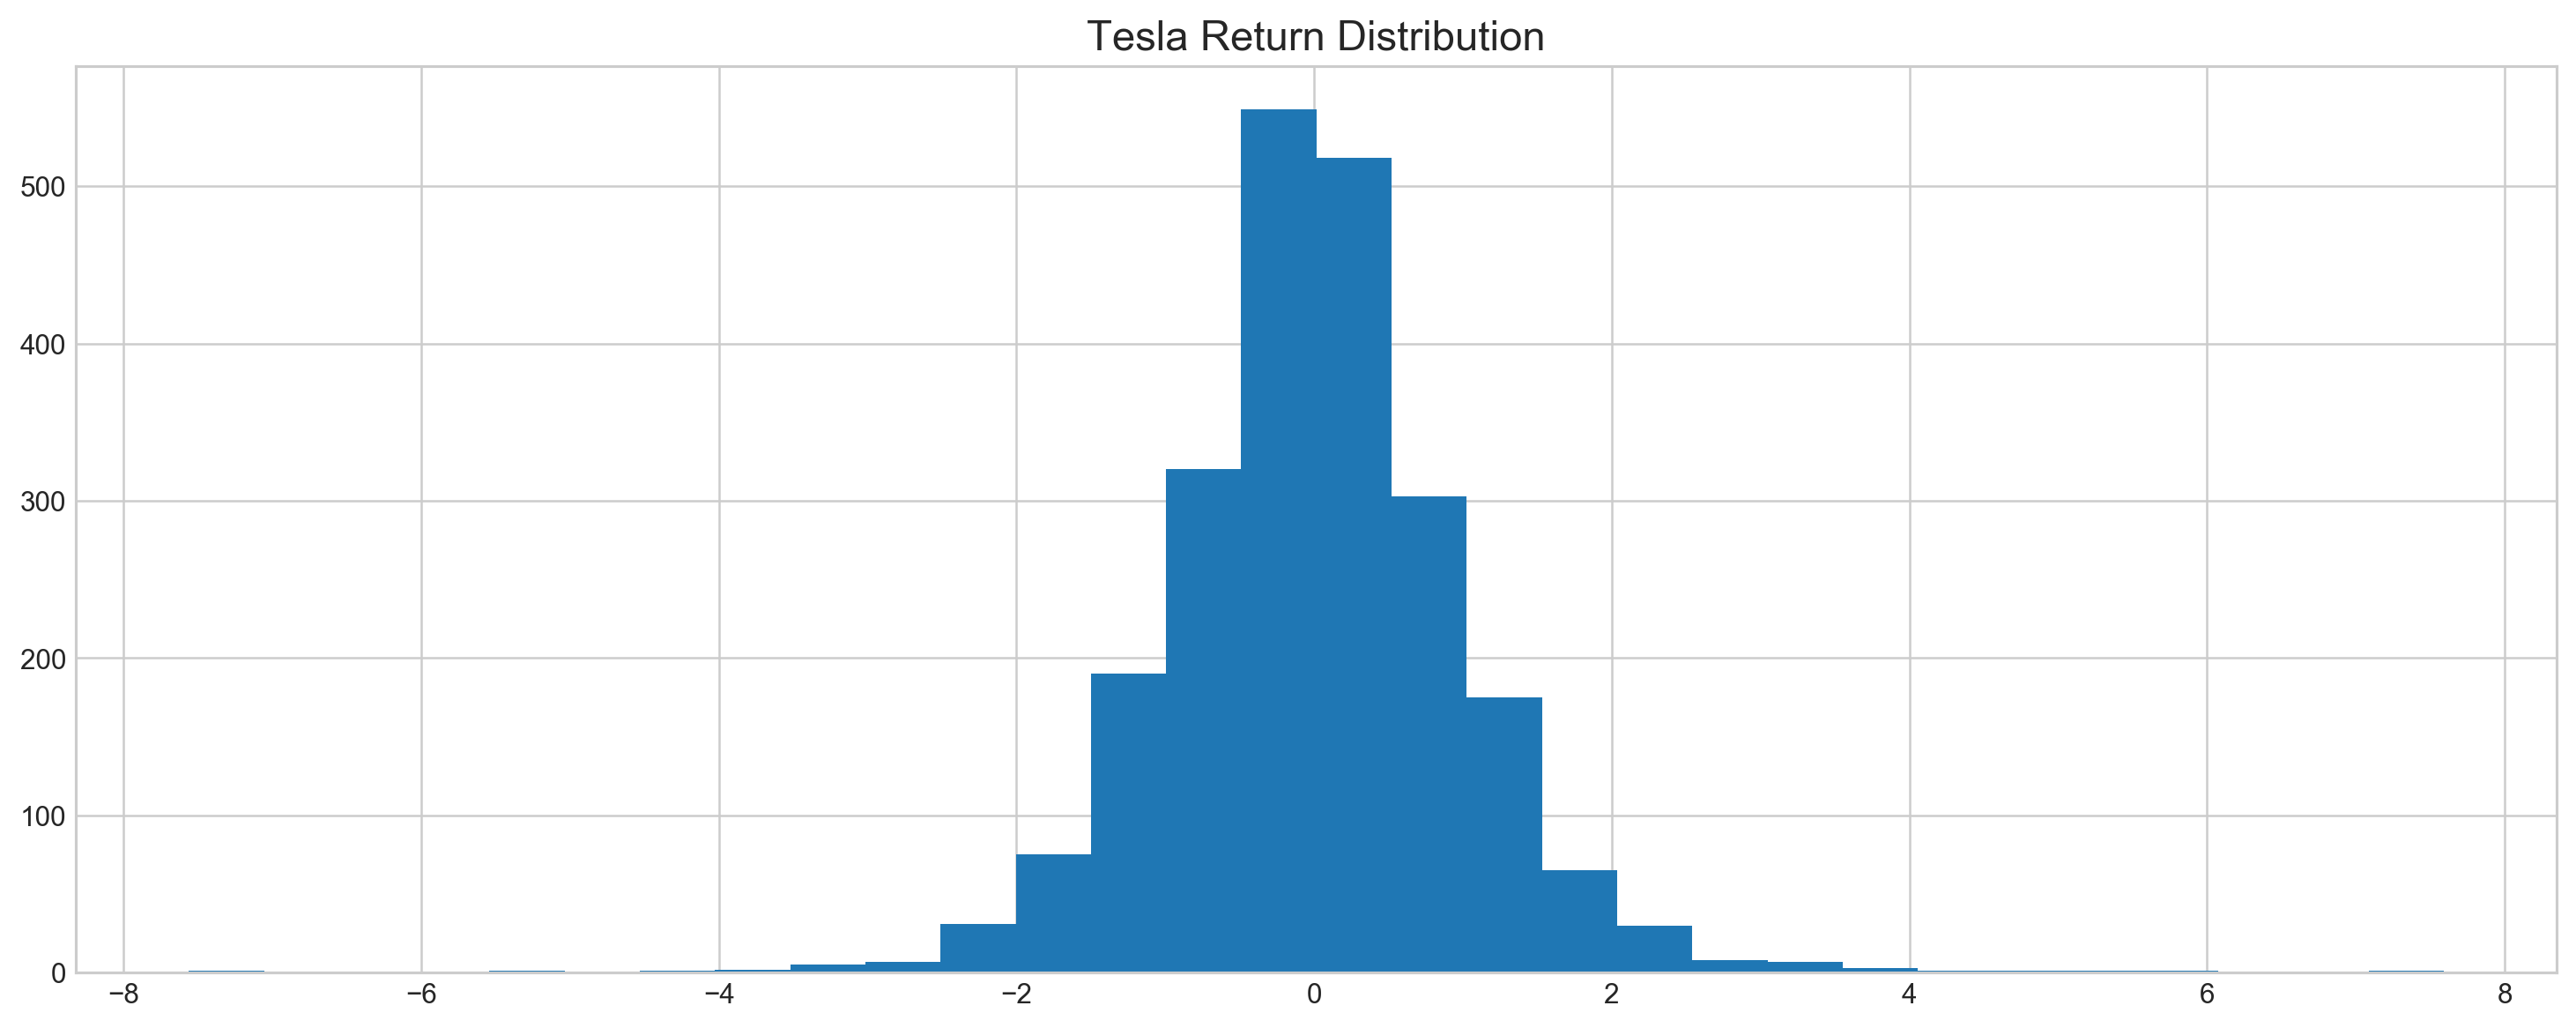

In [115]:
z = lambda x: (x - x.mean()) / x.std()

plt.hist(z(stocks['tsla'].Return), bins=30)
plt.title('Tesla Return Distribution', fontsize=15)
plt.show()

<Figure size 3632x1362 with 0 Axes>

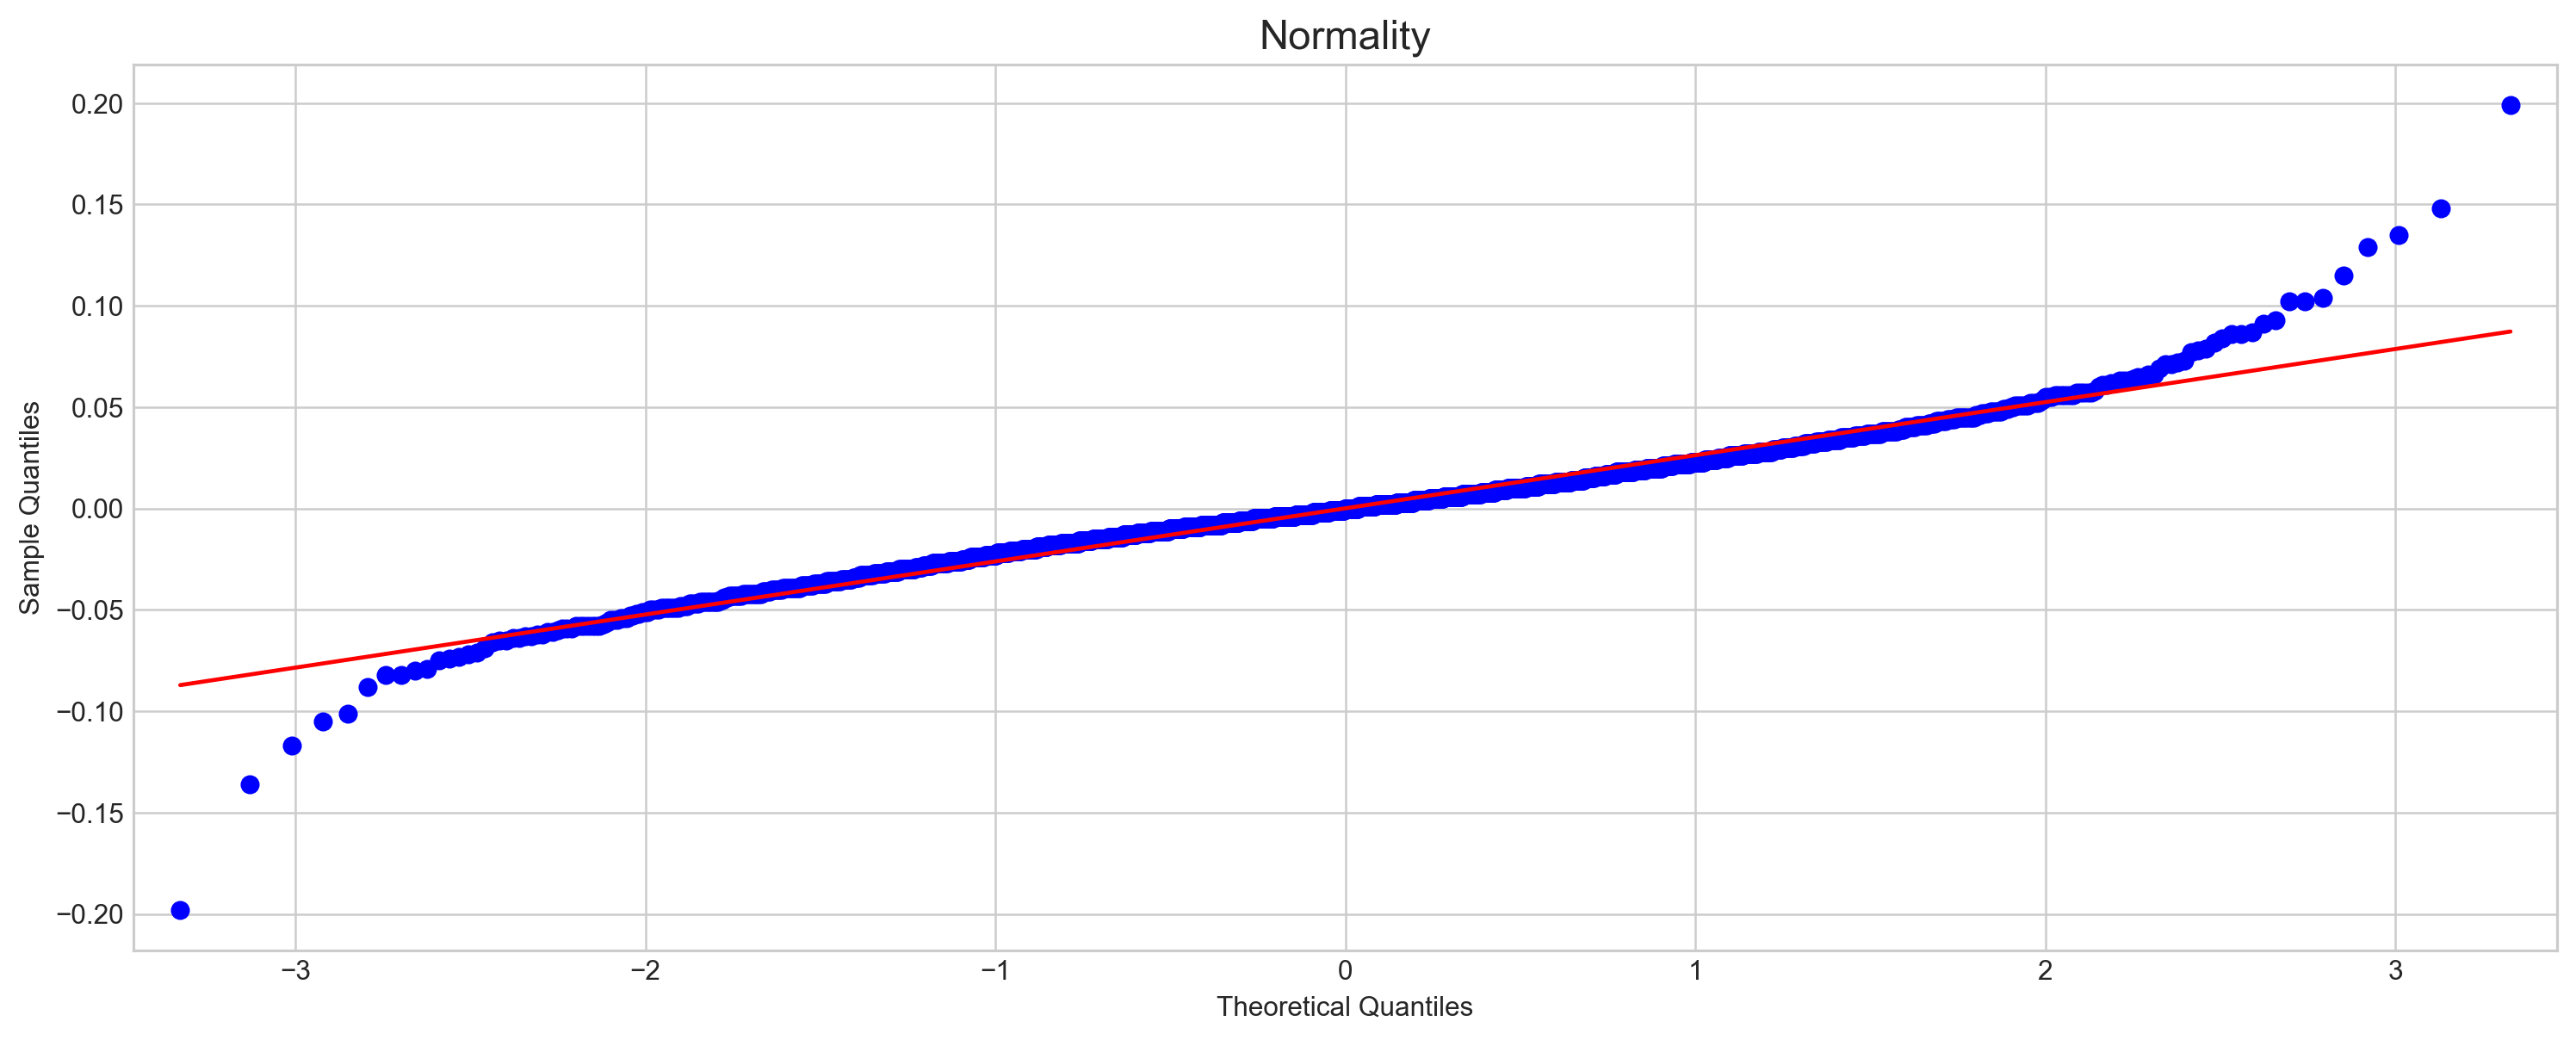

In [103]:
plt.figure(figsize=(16,6))
plt.rcParams['figure.dpi'] = 227
sm.qqplot(stocks['tsla'].Return, line='s', scale=1)
plt.rcParams['figure.figsize'] = [16.0, 6.0]
plt.title('Normality', fontsize=15)
plt.show()

# Conclusion

- `Return` has 64% correlation with `Change` feature. 
- `Close` value stays inside Bollinger Bands
- `Return` feature mostly normal
